In [26]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Adam Jones_Trans 1.csv"
csv_path2 = "../Player Tweets/Adam Jones_Trans 2.csv"
csv_path3 = "../Player Tweets/Adam Jones_Trans 3.csv"
csv_path4 = "../Player Tweets/Adam Jones_Trans 4.csv"

#Establish pd dataframe for each file
adamjones1 = pd.read_csv(csv_path1, sep=";")
adamjones2 = pd.read_csv(csv_path2, sep=";")
adamjones3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)
adamjones4 = pd.read_csv(csv_path4, sep=";")

#concatenate data frames 
adamjones_master = pd.concat([adamjones1, adamjones2, adamjones3, adamjones4])
adamjones_master

b'Skipping line 1005: expected 10 fields, saw 11\nSkipping line 1014: expected 10 fields, saw 11\nSkipping line 1037: expected 10 fields, saw 11\nSkipping line 1038: expected 10 fields, saw 11\nSkipping line 1058: expected 10 fields, saw 11\nSkipping line 1060: expected 10 fields, saw 11\nSkipping line 1065: expected 10 fields, saw 11\nSkipping line 1072: expected 10 fields, saw 11\nSkipping line 1075: expected 10 fields, saw 11\nSkipping line 1078: expected 10 fields, saw 11\nSkipping line 1080: expected 10 fields, saw 11\nSkipping line 1081: expected 10 fields, saw 11\nSkipping line 1082: expected 10 fields, saw 11\nSkipping line 1083: expected 10 fields, saw 11\nSkipping line 1085: expected 10 fields, saw 11\nSkipping line 1088: expected 10 fields, saw 11\nSkipping line 1091: expected 10 fields, saw 11\nSkipping line 1092: expected 10 fields, saw 11\nSkipping line 1093: expected 10 fields, saw 11\nSkipping line 1094: expected 10 fields, saw 11\nSkipping line 1095: expected 10 fields

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-28 16:52,0,0,Fantasy Football New Pacman Jones Officially a...,NaN,NaN,NaN,7.990474e+08,https://twitter.com/FantasyFootball/status/799...
1,NaN,2008-04-22 05:10,0,0,Police: Suspect threatened Pacman: Adam Pacman...,NaN,NaN,NaN,7.941936e+08,https://twitter.com/FanNation/status/794193621
0,NaN,2009-01-13 17:13,0,0,"What's behind the Adam Pacman"" Jones story.......",NaN,NaN,NaN,1.116898e+09,https://twitter.com/dkwilsonisland/status/1116...
1,NaN,2009-01-13 06:32,0,0,Adam 'Pacman' Jones: 'I like the strip clubs':...,NaN,NaN,NaN,1.115497e+09,https://twitter.com/q_salazar/status/1115496561
2,NaN,2009-01-13 06:30,0,0,Adam 'Pacman' Jones: 'I like the strip clubs' ...,NaN,NaN,NaN,1.115493e+09,https://twitter.com/blackvoices/status/1115492933
3,NaN,2009-01-12 22:26,0,0,"Man, is Adam Pacman"" Jones the biggest tool in...",NaN,NaN,NaN,1.114906e+09,https://twitter.com/JimmySunshine/status/11149...
4,NaN,2009-01-12 15:58,0,0,"Read about Adam Pacman"" Jones: http://tinyurl....",NaN,NaN,NaN,1.114136e+09,https://twitter.com/jcphenom/status/1114136143
5,NaN,2009-01-11 15:19,0,0,B/R >> RIP: Here Lies the NFL Career of Pacman...,NaN,NaN,NaN,1.111631e+09,https://twitter.com/BR_Cowboys/status/1111631020
6,NaN,2009-01-11 08:14,0,0,Any body watchin espn ? This nigga slugga is f...,NaN,NaN,NaN,1.110961e+09,https://twitter.com/HairStylesByHer/status/111...
7,NaN,2009-01-11 06:37,0,0,"Adam Pacman"" Jones dice que la temporada que v...",NaN,NaN,NaN,1.110863e+09,https://twitter.com/footballspeech/status/1110...


In [27]:
#fillna's with text to fix error
adamjones_master["text"].fillna("text", inplace=True)
adamjones_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2008-04-28 16:52,0,0,Fantasy Football New Pacman Jones Officially a...,NaN,NaN,NaN,7.990474e+08,https://twitter.com/FantasyFootball/status/799...
1,NaN,2008-04-22 05:10,0,0,Police: Suspect threatened Pacman: Adam Pacman...,NaN,NaN,NaN,7.941936e+08,https://twitter.com/FanNation/status/794193621
0,NaN,2009-01-13 17:13,0,0,"What's behind the Adam Pacman"" Jones story.......",NaN,NaN,NaN,1.116898e+09,https://twitter.com/dkwilsonisland/status/1116...
1,NaN,2009-01-13 06:32,0,0,Adam 'Pacman' Jones: 'I like the strip clubs':...,NaN,NaN,NaN,1.115497e+09,https://twitter.com/q_salazar/status/1115496561
2,NaN,2009-01-13 06:30,0,0,Adam 'Pacman' Jones: 'I like the strip clubs' ...,NaN,NaN,NaN,1.115493e+09,https://twitter.com/blackvoices/status/1115492933


In [28]:
#create list of sentiment scores associated with tweets about relevant player

adamjones_sent = []

tweets = adamjones_master["text"]

for index,tweet in adamjones_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    adamjones_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
adamjones_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2008-04-28 16:52'},
 {'Compound': -0.6369,
  'Negative': 0.679,
  'Neutral': 0.321,
  'Positive': 0.0,
  'date': '2008-04-22 05:10'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-01-13 17:13'},
 {'Compound': 0.3612,
  'Negative': 0.731,
  'Neutral': 0.078,
  'Positive': 0.192,
  'date': '2009-01-13 06:32'},
 {'Compound': 0.3612,
  'Negative': 0.762,
  'Neutral': 0.0,
  'Positive': 0.238,
  'date': '2009-01-13 06:30'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-01-12 22:26'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2009-01-12 15:58'},
 {'Compound': -0.4215,
  'Negative': 0.877,
  'Neutral': 0.123,
  'Positive': 0.0,
  'date': '2009-01-11 15:19'},
 {'Compound': 0.6908,
  'Negative': 0.769,
  'Neutral': 0.0,
  'Positive': 0.231,
  'date': '2009-01-11 08:14'},
 {'Comp

In [29]:
# Convert player sentiments to DataFrame
AJ_pd = pd.DataFrame.from_dict(adamjones_sent)
AJ_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.000,2008-04-28 16:52
1,-0.6369,0.679,0.321,0.000,2008-04-22 05:10
2,0.0000,1.000,0.000,0.000,2009-01-13 17:13
3,0.3612,0.731,0.078,0.192,2009-01-13 06:32
4,0.3612,0.762,0.000,0.238,2009-01-13 06:30


In [30]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(adamjones_master, AJ_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2008-04-28 16:52,0,0,Fantasy Football New Pacman Jones Officially a...,NaN,NaN,NaN,7.990474e+08,https://twitter.com/FantasyFootball/status/799...,0.0000,1.000,0.000,0.000
1,NaN,2008-04-22 05:10,0,0,Police: Suspect threatened Pacman: Adam Pacman...,NaN,NaN,NaN,7.941936e+08,https://twitter.com/FanNation/status/794193621,-0.6369,0.679,0.321,0.000
2,NaN,2009-01-13 17:13,0,0,"What's behind the Adam Pacman"" Jones story.......",NaN,NaN,NaN,1.116898e+09,https://twitter.com/dkwilsonisland/status/1116...,0.0000,1.000,0.000,0.000
3,NaN,2009-01-13 06:32,0,0,Adam 'Pacman' Jones: 'I like the strip clubs':...,NaN,NaN,NaN,1.115497e+09,https://twitter.com/q_salazar/status/1115496561,0.3612,0.731,0.078,0.192
4,NaN,2009-01-13 06:30,0,0,Adam 'Pacman' Jones: 'I like the strip clubs' ...,NaN,NaN,NaN,1.115493e+09,https://twitter.com/blackvoices/status/1115492933,0.3612,0.762,0.000,0.238


In [31]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2008-04-28 16:52,0,0,Fantasy Football New Pacman Jones Officially a...,NaN,NaN,NaN,7.990474e+08,https://twitter.com/FantasyFootball/status/799...,0.0000,1.000,0.000,0.000,2008-04-28
1,NaN,2008-04-22 05:10,0,0,Police: Suspect threatened Pacman: Adam Pacman...,NaN,NaN,NaN,7.941936e+08,https://twitter.com/FanNation/status/794193621,-0.6369,0.679,0.321,0.000,2008-04-22
2,NaN,2009-01-13 17:13,0,0,"What's behind the Adam Pacman"" Jones story.......",NaN,NaN,NaN,1.116898e+09,https://twitter.com/dkwilsonisland/status/1116...,0.0000,1.000,0.000,0.000,2009-01-13
3,NaN,2009-01-13 06:32,0,0,Adam 'Pacman' Jones: 'I like the strip clubs':...,NaN,NaN,NaN,1.115497e+09,https://twitter.com/q_salazar/status/1115496561,0.3612,0.731,0.078,0.192,2009-01-13
4,NaN,2009-01-13 06:30,0,0,Adam 'Pacman' Jones: 'I like the strip clubs' ...,NaN,NaN,NaN,1.115493e+09,https://twitter.com/blackvoices/status/1115492933,0.3612,0.762,0.000,0.238,2009-01-13


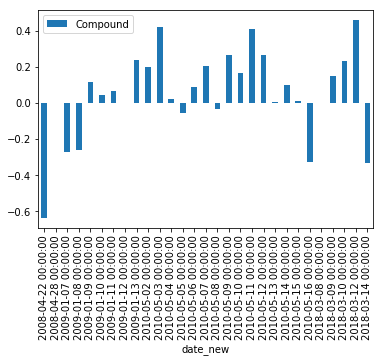

In [32]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('adamjones.png')
plt.show()
